# Analysis of research
## A presentation on different approaches to clustering NFTRank data

This notebook will cover various topics including clustering algorithms and dimension reduction techniques via Python. The goal of this research is to mix different approaches of dimension reduction techniques with clustering algorithms (PCA with K-Means, or UMAP with DBSCAN) to prove that clustering NFTRank data is possible for SwapEase. Finding/creating a successful approach will give SwapEase a critical edge in the market. Such a process does not exist in the NFT space, and can be a powerful tool in a seasoned trader's hands. The summation of this research will help create descriptive enough data that will provide key insights for NFT arbitrage. 

I believe that clustering NFTs within a specific collection can help us achieve this. We can extract key information from "like NFTs" with efficient performance at scale. Information included could be anything from averages of trades to performance of clusters in the current market. This would be guided by the cluster since it reduces the scope of information to conglomerate.

In [13]:
import pandas
from sklearn.preprocessing import StandardScaler

# The data file path used in this document
KOIN_path = "./data/KOIN.csv"
BAYC_path = "./data/BAYC.csv"
DOODLES_path = "./data/DOODLES.csv"
MEKA_path = "./data/MEKA.csv"

constants = [
    {
        'path': KOIN_path,
        'name': "KOIN"
    },
    {
        'path': BAYC_path,
        'name': "BAYC"
    },
    {
        'path': DOODLES_path,
        'name': "DOODLES"
    },
    {
        'path': MEKA_path,
        'name': "MEKA"
    },
]

# Function to retrieve and set data in a data frame
def retrieve_data_from_csv(path):
    df = pandas.read_csv(path, index_col='token_id')
    return df

# Retrieve all data from constants
def retrieve_data():
    data_frames = []

    for constant in constants:
        data_frames.append(retrieve_data_from_csv(constant['path']))

    return data_frames

# Scale data using StandardScaler
def scale_data():
    scaled_data_frames = []

    for df in NFT_dfs:
        scaled_data_frames.append(StandardScaler().fit_transform(df))

    return scaled_data_frames

NFT_dfs = retrieve_data()
scaled_dfs = scale_data()

In [14]:
# Some functions necessary to analyze the clusters

# Creates an object containing information about the cluster
def get_clusters_dict(labels, data_frame):
    clusters_dict = {}

    for index, token_id in enumerate(data_frame.index):
        # Grab tha lable from the clusters array
        label = labels[index]
        token_information = {
            "token_id": token_id, 
            "rank": index + 1, 
            "token_information": data_frame.iloc[index].values
        }

        # Check if label is in dictionary
        if label in clusters_dict.keys():
            clusters_dict[label].append(token_information)
        else:
            clusters_dict[label] = [token_information]

    return clusters_dict

# Generates Avgs based on Rank and Score, as well as top five ranked NFTs for a cluster
def analyze_clusters(clusters_dict):
    analysis = []
    rank_avg = []
    rank_sum_avg = []
    cluster_keys = clusters_dict.keys()

    for cluster_num in cluster_keys:
        rank_sum = 0
        rank_score_sum = 0
        token_ids = []
        ranks = []

        # Generate rank_sum, rank_score_sum, and gather token_ids
        for token in clusters_dict[cluster_num]:
            rank_sum += token['rank']
            rank_score_sum += sum(token['token_information'])
            token_ids.append(token['token_id'])
            ranks.append(token['rank'])
        
        top_five = sorted(zip(ranks, token_ids), key=lambda t: t[0])[:5]

        # Add top_five tokens in a cluster and cluster number to analysis array
        analysis.append({
            "cluster_#": cluster_num + 1,
            "top_five": top_five
        })
        rank_avg.append(rank_sum/len(clusters_dict[cluster_num]))
        rank_sum_avg.append(rank_score_sum/len(clusters_dict[cluster_num]))

    # Load avgs into pandas df
    avg_df = pandas.DataFrame({"Rank Avg": rank_avg, "Rank Sum Avg": rank_sum_avg}, columns = ['Rank Avg', 'Rank Sum Avg'])

    return {"analysis": analysis, "avg_df": avg_df}

# Creates analysis for all data sets
def get_analysis(clusters):
    cluster_dicts = []

    for i in range(len(NFT_dfs)):
        cluster_dicts.append(get_clusters_dict(clusters[i], NFT_dfs[i]))
    
    analysis = []

    for cluster_dict in cluster_dicts:
        analysis.append(analyze_clusters(cluster_dict))

    return analysis

### UMAP Analysis

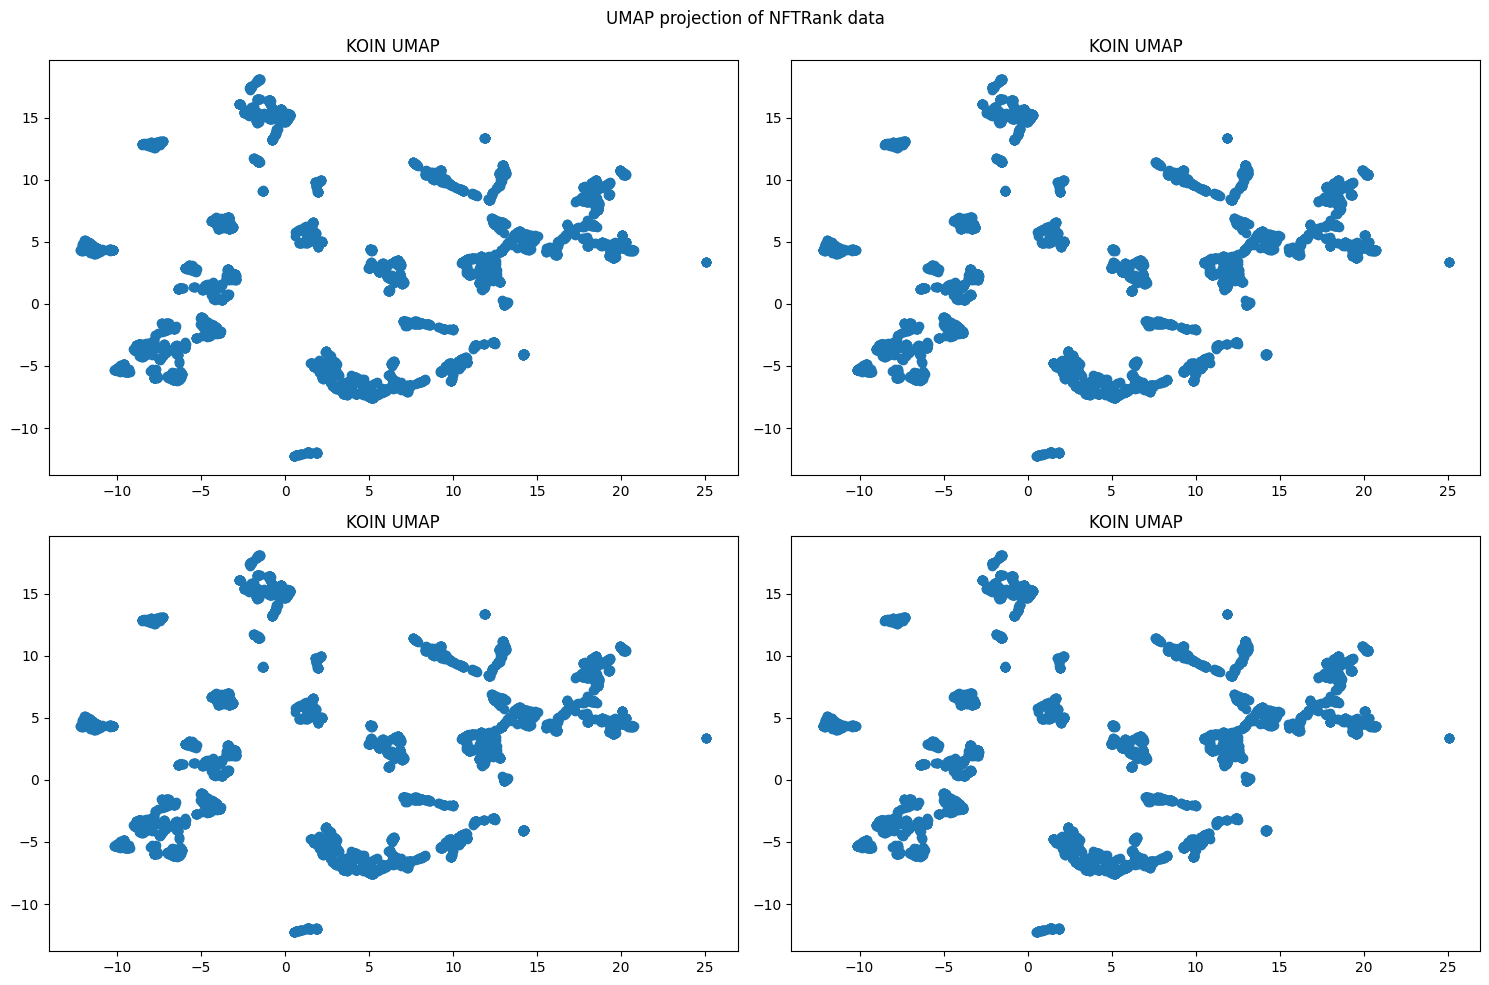

In [31]:
import umap
import matplotlib.pyplot as plt

def create_embeddings():
    embeddings = []

    for scaled_df in scaled_dfs:
        reducer = umap.UMAP()
        embeddings.append(reducer.fit_transform(scaled_df))

    return embeddings

def generate_UMAP_plots(embeddings):
    fig, axs = plt.subplots(2,2, figsize=(15,10))
    
    fig.suptitle("UMAP projection of NFTRank data")

    x = 0
    y = 0

    for i in range(0, 4):
        axs[x,y].set_title("{} UMAP".format(constants[i]['name']))
        axs[x,y].scatter(embeddings[i][:, 0], embeddings[i][:, 1])

        if (i + 1) % 2 == 0:
            x += 1
            y = 0
        else:
            y += 1

    fig.tight_layout()
    plt.show()

# Create UMAP embeddings to see associated graphs
UMAP_embeddings = create_embeddings()

# Generate the graph for all data sets
generate_UMAP_plots(embeddings=UMAP_embeddings)

In [34]:
# Displays clustered data from UMAP via clustering methods AND displays analysis plots to see where clusters scale
def generate_UMAP_cluster_plots_and_analyze(embeddings, clusters, analysis, cluster_method_title):
    fig, axs = plt.subplots(4,2, figsize=(15,20))
    
    fig.suptitle("UMAP projection of NFTRank data {}".format(cluster_method_title))

    axs[0,0].set_title("{} Clusters".format(constants[0]['name']))
    axs[0,0].scatter(embeddings[0][:, 0], embeddings[0][:, 1], c=clusters[0])

    axs[0,1].set_title("{} Clusters".format(constants[1]['name']))
    axs[0,1].scatter(embeddings[1][:, 0], embeddings[1][:, 1], c=clusters[1])

    axs[1,0].set_title("{} Clusters".format(constants[2]['name']))
    axs[1,0].scatter(embeddings[2][:, 0], embeddings[2][:, 1], c=clusters[2])

    axs[1,1].set_title("{} Clusters".format(constants[3]['name']))
    axs[1,1].scatter(embeddings[3][:, 0], embeddings[3][:, 1], c=clusters[3])

    axs[2,0].set_title("{} analysis ({} points)".format(constants[0]['name'],len(analysis[0]['avg_df'])))
    axs[2,0].scatter(x=analysis[0]['avg_df']['Rank Avg'], y=analysis[0]['avg_df']['Rank Sum Avg'])

    axs[2,1].set_title("{} analysis ({} points)".format(constants[1]['name'],len(analysis[1]['avg_df'])))
    axs[2,1].scatter(x=analysis[1]['avg_df']['Rank Avg'], y=analysis[1]['avg_df']['Rank Sum Avg'])

    axs[3,0].set_title("{} analysis ({} points)".format(constants[2]['name'],len(analysis[2]['avg_df'])))
    axs[3,0].scatter(x=analysis[2]['avg_df']['Rank Avg'], y=analysis[2]['avg_df']['Rank Sum Avg'])

    axs[3,1].set_title("{} analysis ({} points)".format(constants[3]['name'],len(analysis[3]['avg_df'])))
    axs[3,1].scatter(x=analysis[3]['avg_df']['Rank Avg'], y=analysis[3]['avg_df']['Rank Sum Avg'])
    
    fig.tight_layout()
    plt.show()

### Clustering with DBSCAN

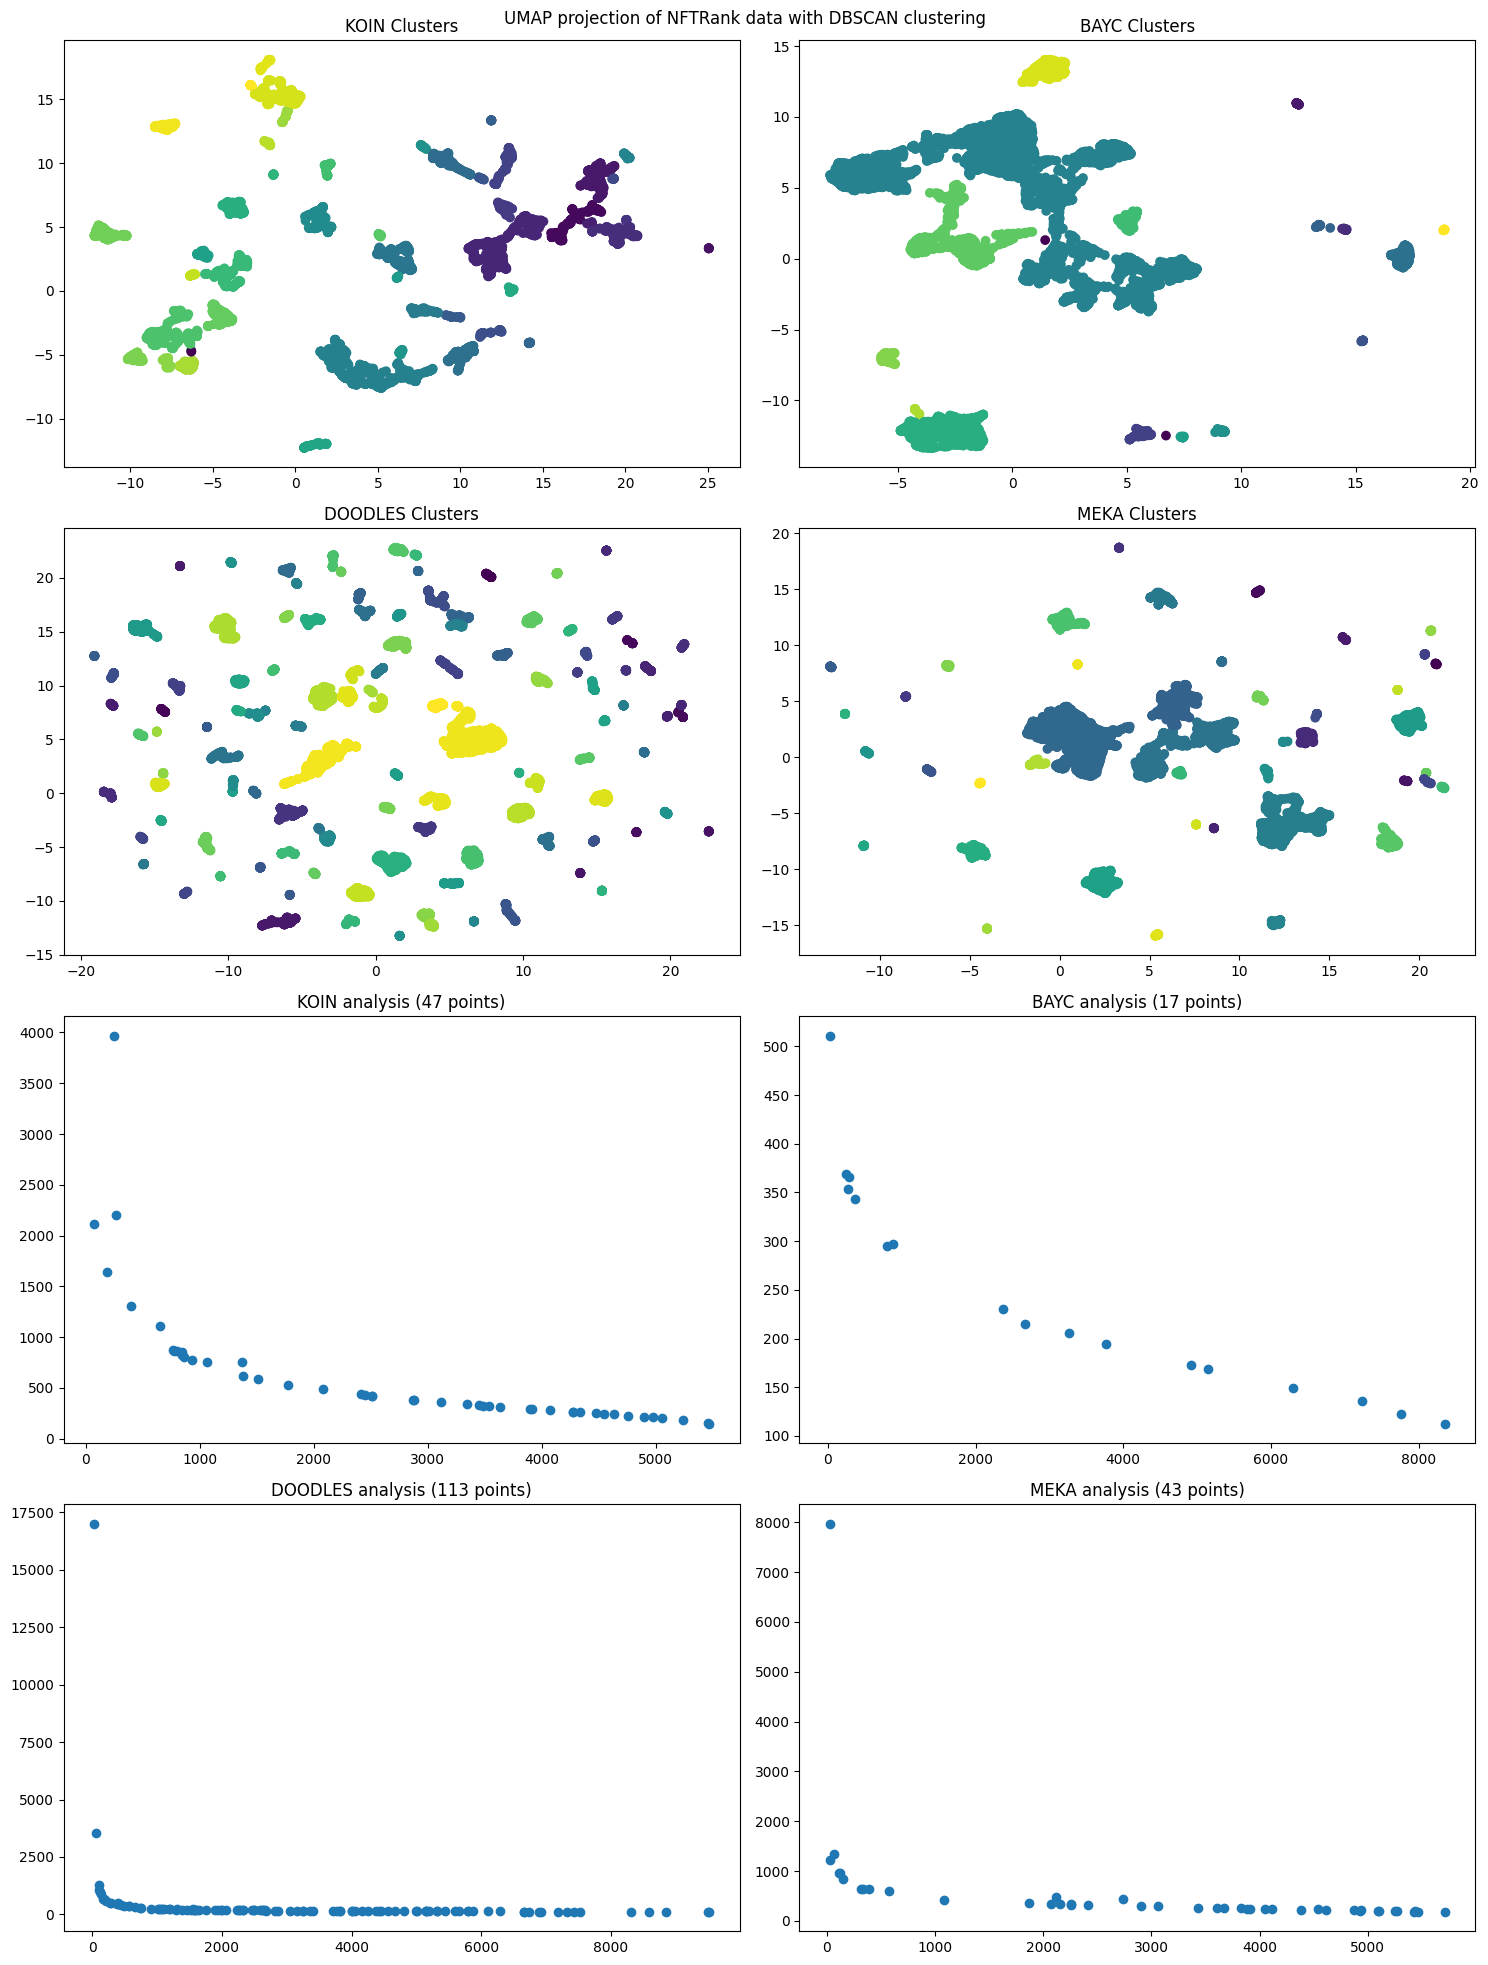

In [35]:
from sklearn.cluster import DBSCAN

def get_DBSCAN_clusters(embeddings):
    clusters = []

    for embedding in embeddings:
        clusterer_DBSCAN = DBSCAN(eps=.5)
        clusters.append(clusterer_DBSCAN.fit_predict(embedding))

    return clusters

UMAP_DBSCAN_clusters = get_DBSCAN_clusters(UMAP_embeddings)
UMAP_DBSCAN_analysis = get_analysis(UMAP_DBSCAN_clusters)

generate_UMAP_cluster_plots_and_analyze(UMAP_embeddings, UMAP_DBSCAN_clusters, UMAP_DBSCAN_analysis, "with DBSCAN clustering")

### Clustering with KMeans

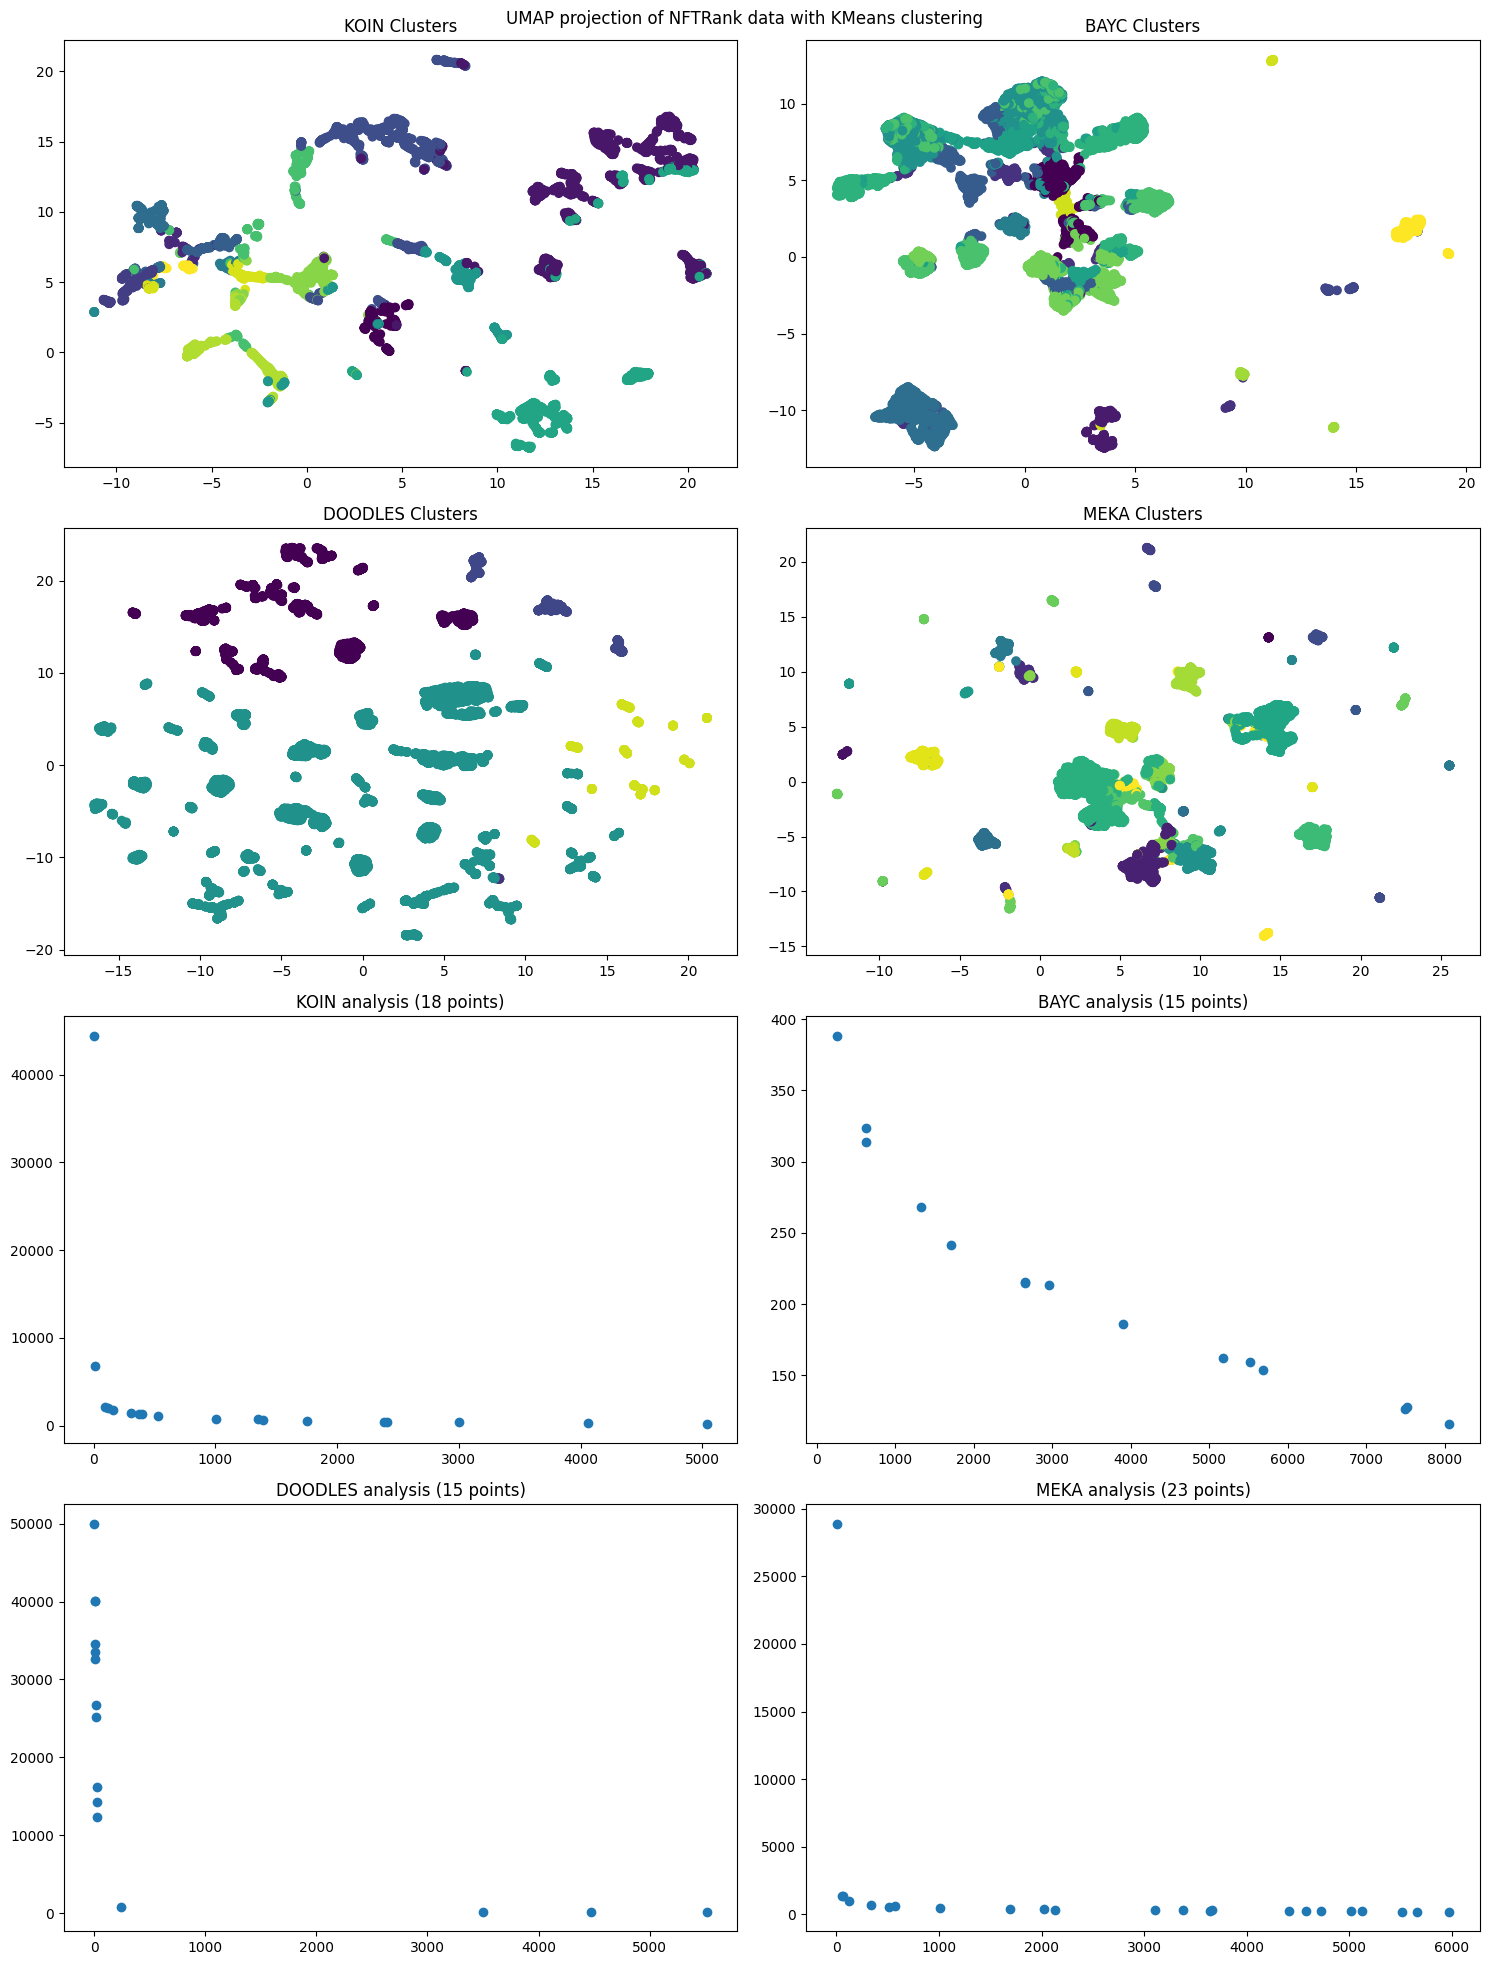

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

kmeans_kwargs = {
    "init": "random",
    "n_init": 50,
    "max_iter": 500,
}

def get_KMeans_labels_via_silhouette():
    kmeans_labels = []

    for scaled_df in scaled_dfs:
        best_score = -1
        labels = 0

        for k in range(15, 25):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(scaled_df)
            score = silhouette_score(scaled_df, kmeans.labels_)

            if score > best_score:
                best_score = score
                labels = kmeans.labels_

        kmeans_labels.append(labels)

    return kmeans_labels

KMean_clusters = get_KMeans_labels_via_silhouette()
UMAP_KMean_analysis = get_analysis(KMean_clusters)

generate_UMAP_cluster_plots_and_analyze(UMAP_embeddings, KMean_clusters, UMAP_KMean_analysis, "with KMeans clustering")

### Clustering with Agglomerative Clustering

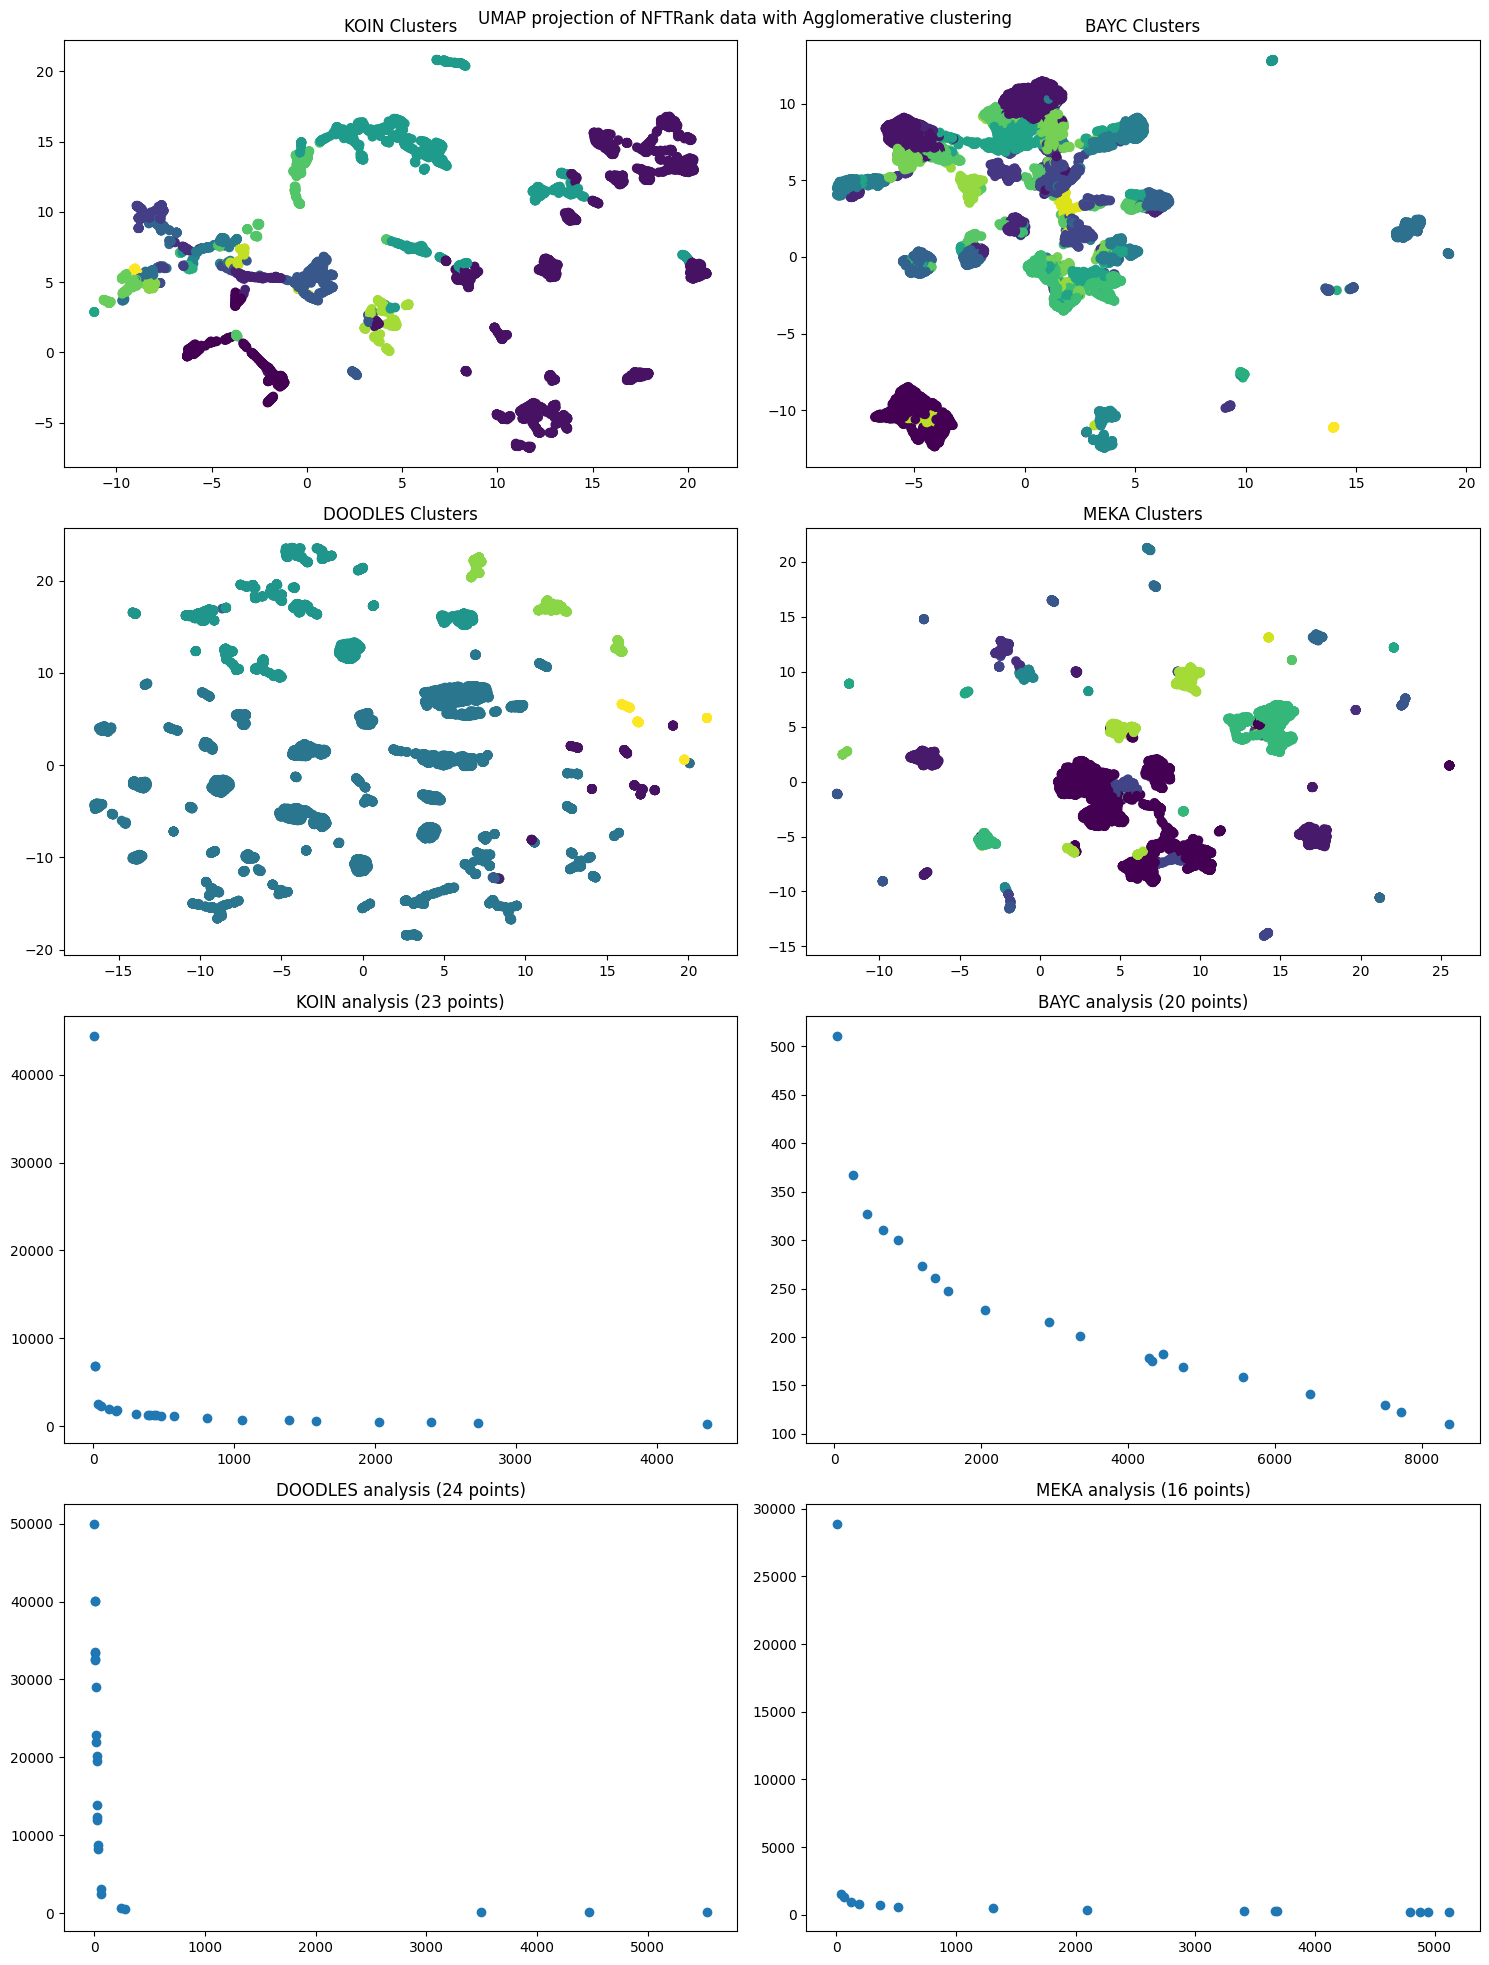

In [19]:
from sklearn.cluster import AgglomerativeClustering

def get_Agglomerative_labels_via_silhouette():
    agglomerative_labels = []

    for scaled_df in scaled_dfs:
        best_score = -1
        labels = 0

        for k in range(15, 25):
            agglomerative_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
            agglomerative_model.fit(scaled_df)
            score = silhouette_score(scaled_df, agglomerative_model.labels_)

            if score > best_score:
                best_score = score
                labels = agglomerative_model.labels_

        agglomerative_labels.append(labels)

    return agglomerative_labels

Agglomerative_clusters = get_Agglomerative_labels_via_silhouette()
UMAP_Agglomerative_analysis = get_analysis(Agglomerative_clusters)

generate_UMAP_cluster_plots_and_analyze(UMAP_embeddings, Agglomerative_clusters, UMAP_Agglomerative_analysis, "with Agglomerative clustering")

In [20]:
def print_clusters(analysis):
    for i in range(0, 3):
        print("Cluster {}".format(analysis[i]['cluster_#']))
        for t in analysis[i]['top_five']:
            print("\t Rank: {}\t TokenId: {}".format(t[0], t[1]))

Now, we analyze the proficiency of UMAP as a dimension reduction technique. We also need to compare clustering methods against one another.

Judging from the UMAP graph at the top, this dimension reduction technique works well for our data. We can see regions where data points conglomerate, giving the appearance of clusters. In the case of DOODLES, the points are spread out. BAYC is an extreme example of most points gathering in one to two regions of the graph. KOIN exists more in the middle of the latter two. Almost all points connect to a small region, and many of these regions exist.

1. DBSCAN
- Pros:
  - Very fast
  - Colored clusters from plots appear in line with what we might imagine the clusters to be
  - Analysis plots seem correct
- Cons:
  - Number of clusters is unknown until labels are generated

In [25]:
print_clusters(UMAP_DBSCAN_analysis[0]['analysis'])

Cluster 1
	 Rank: 1	 TokenId: 5532
	 Rank: 2	 TokenId: 4901
	 Rank: 3	 TokenId: 3983
	 Rank: 4	 TokenId: 3815
	 Rank: 5	 TokenId: 3073
Cluster 2
	 Rank: 17	 TokenId: 5245
	 Rank: 21	 TokenId: 1125
	 Rank: 22	 TokenId: 1944
	 Rank: 25	 TokenId: 1328
	 Rank: 30	 TokenId: 209
Cluster 3
	 Rank: 33	 TokenId: 1206
	 Rank: 54	 TokenId: 4616
	 Rank: 56	 TokenId: 4604
	 Rank: 65	 TokenId: 3784
	 Rank: 67	 TokenId: 986


Examining the composition of the clusters for KOIN, we can see that the one-of-ones have joined under cluster 1. This is desirable behavior. Since one-of-ones are ranked at the highest in a collection, it makes sense that they belong in a cluster apart from the rest.

2. KMeans
- Pros:
  - Analysis plots seem correct
- Cons:
  - Very slow processing time due to silhouette coefficient calculations
  - Colored clusters from plots seem to mix (some centroids might be close to other centroids)

In [22]:
print_clusters(UMAP_KMean_analysis[0]['analysis'])

Cluster 14
	 Rank: 1	 TokenId: 5532
	 Rank: 2	 TokenId: 4901
	 Rank: 3	 TokenId: 3983
	 Rank: 4	 TokenId: 3815
	 Rank: 5	 TokenId: 3073
Cluster 12
	 Rank: 11	 TokenId: 3397
Cluster 3
	 Rank: 12	 TokenId: 2986
	 Rank: 13	 TokenId: 4159
	 Rank: 14	 TokenId: 3824
	 Rank: 18	 TokenId: 455
	 Rank: 19	 TokenId: 3241


Again here, one-of-ones have joined under the first cluster. Interestingly, cluster 20 only has one NFT within it. This is not desirable behavior.

3. Agglomerative
- Pros:
  - Analysis plots seem correct
- Cons:
  - Very slow processing time due to silhouette coefficient calculations
  - Colored clusters from plots seem to mix. Compared to KMeans, there seems to be less mixing

In [23]:
print_clusters(UMAP_Agglomerative_analysis[0]['analysis'])

Cluster 16
	 Rank: 1	 TokenId: 5532
	 Rank: 2	 TokenId: 4901
	 Rank: 3	 TokenId: 3983
	 Rank: 4	 TokenId: 3815
	 Rank: 5	 TokenId: 3073
Cluster 22
	 Rank: 11	 TokenId: 3397
Cluster 12
	 Rank: 12	 TokenId: 2986


Here, we have two clusters with only one NFT. This is even worse than KMeans, but this issue can occur with either.

Using UMAP, DBSCAN is the best fit...